In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_meta = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/meta.csv')
df_meta.head()

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2

In [5]:
df_dicom = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
df_dicom.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [6]:
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [7]:
# check image path in dataset
# cropped images
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
#cropped_images.head(5)

In [8]:
#full mammogram images
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path

In [9]:
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path

In [10]:
imdir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [11]:
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [12]:
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[4]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[4]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[4]
    roi_img[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [13]:
mass_train = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
mass_test = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv')

mass_train.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [14]:
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]
        
# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

In [15]:
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [16]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [17]:
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape   mass_margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped_image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI_mask_file_path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [18]:
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [19]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [20]:
mass_train.describe()

breast_density  abnormality_id   assessment     subtlety
count     1318.000000     1318.000000  1318.000000  1318.000000
mean         2.203338        1.116085     3.504552     3.965857
std          0.873774        0.467013     1.414609     1.102032
min          1.000000        1.000000     0.000000     0.000000
25%          2.000000        1.000000     3.000000     3.000000
50%          2.000000        1.000000     4.000000     4.000000
75%          3.000000        1.000000     4.000000     5.000000
max          4.000000        6.000000     5.000000     5.000000

In [21]:
mass_test.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality type mass shape   mass margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image file path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped image file path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI mask file path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....

In [22]:
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [23]:
mass_test.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [24]:
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [25]:
# fill in missing values using the backwards fill method
mass_test['mass_margins'] = mass_test['mass_margins'].bfill()

#check null values
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

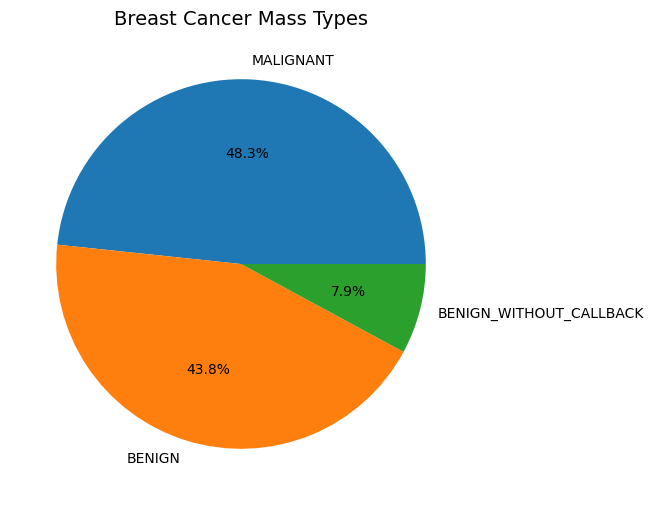

In [26]:
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.savefig('/kaggle/working/pathology_distributions_red.png')
plt.show()

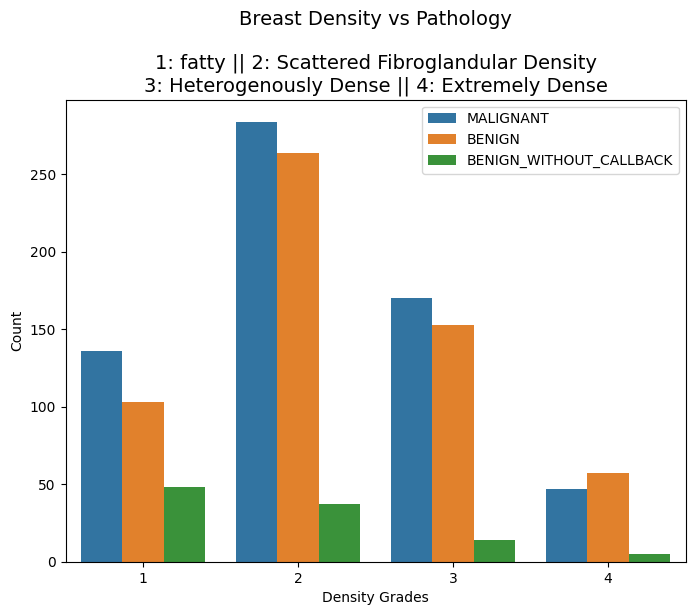

In [27]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
plt.savefig('/kaggle/working/density_pathology_red.png')
plt.show()

Full Mammograms:



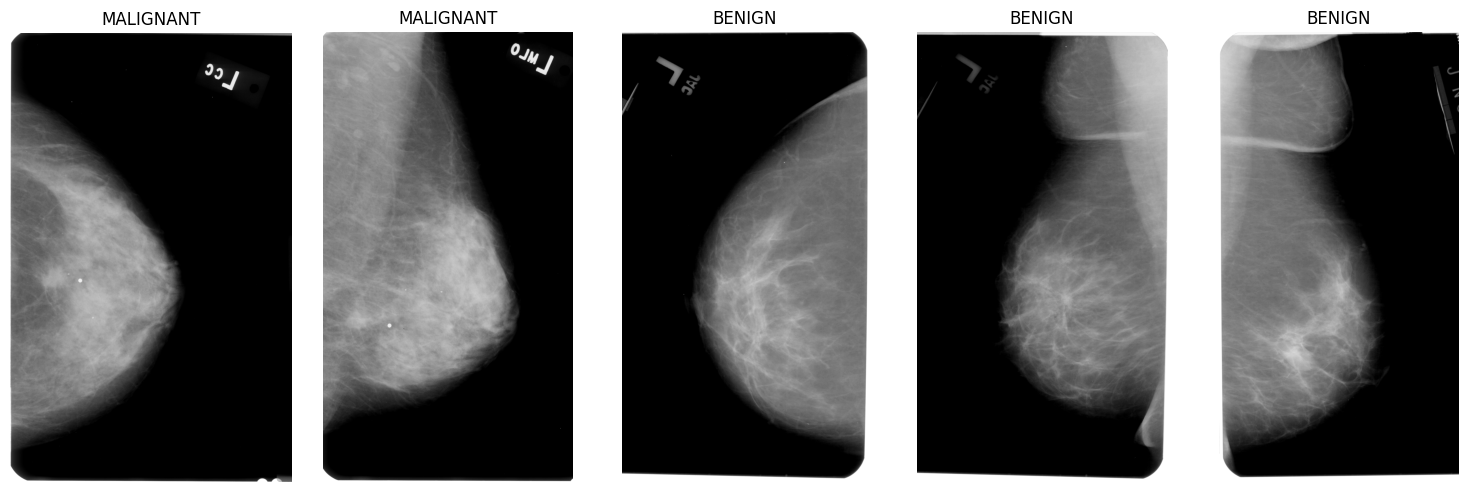

Cropped Mammograms:



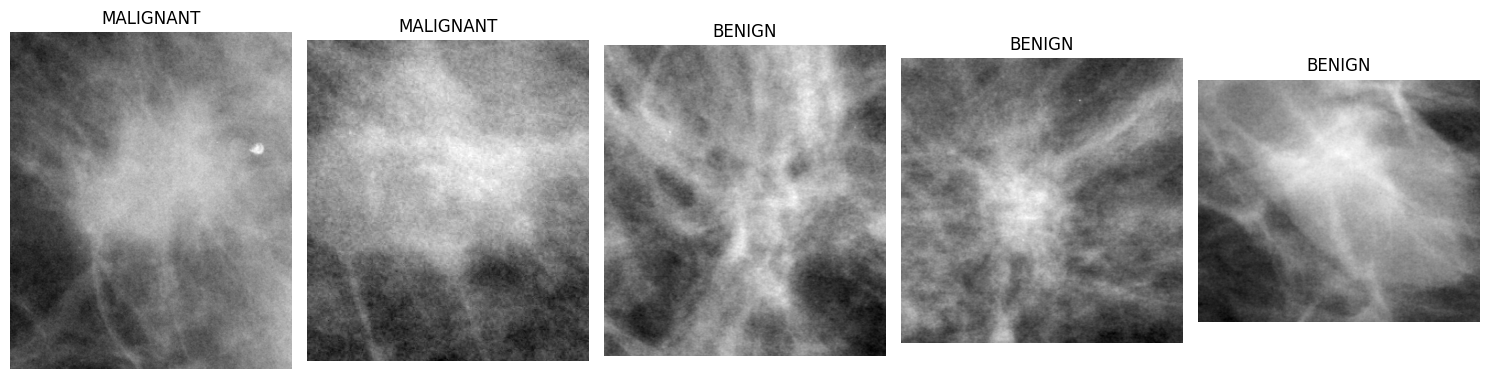

In [28]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

In [29]:
!pip install tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 15.5 MB/s eta 0:00:0000:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
ydata-profiling 4.6.4 requires typeguard<5,>=4.1.2, but you have typeguard 2.13.3 which is incompatible.


In [34]:
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import os
import numpy as np
auc = tf.keras.metrics.AUC()


def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array


full_mass = pd.concat([mass_train, mass_test], axis=0)

target_size = (224, 224, 3)


full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))


class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 


X_resized = np.array(full_mass['processed_images'].tolist())


full_mass['labels'] = full_mass['pathology'].replace(class_mapper)


num_classes = len(full_mass['labels'].unique())

/tmp/ipykernel_34/2917013044.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_mass['labels'] = full_mass['pathology'].replace(class_mapper)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resized, full_mass['labels'].values, test_size = 0.2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))
print('X_val shape: {}' .format(X_val.shape))
print('y_val shape: {}' .format(y_val.shape))

X_train shape : (1356, 224, 224, 3)
X_test shape : (170, 224, 224, 3)
y_train shape : (1356, 2)
y_test shape : (170, 2)
X_val shape: (170, 224, 224, 3)
y_val shape: (170, 2)


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=20)


image_size=224
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=32)

In [39]:
import tensorflow as tf
from tensorflow.keras import layers

class BatchAttNorm(tf.keras.layers.Layer):
    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super(BatchAttNorm, self).__init__()
        self.avg = layers.GlobalAveragePooling2D()
        self.sigmoid = layers.Activation('sigmoid')
        self.weight = self.add_weight(shape=(1, 1, num_features), initializer='ones', trainable=True)
        self.bias = self.add_weight(shape=(1, 1, num_features), initializer='zeros', trainable=True)
        self.weight_readjust = self.add_weight(shape=(1, 1, num_features), initializer='zeros', trainable=True)
        self.bias_readjust = self.add_weight(shape=(1, 1, num_features), initializer='zeros', trainable=True)
        self.bn = layers.BatchNormalization(epsilon=eps, momentum=momentum)

    def call(self, inputs, training=None):
        attention = self.sigmoid(tf.expand_dims(tf.expand_dims(self.avg(inputs), axis=1), axis=1) * self.weight_readjust + self.bias_readjust)
        bn_w = self.weight * attention

        out_bn = self.bn(inputs)
        out_bn = out_bn * bn_w + self.bias

        return out_bn

class Mish(tf.keras.layers.Layer):
    def __init__(self):
        super(Mish, self).__init__()

    def call(self, x):
        return x * tf.math.tanh(tf.math.softplus(x))

class SpatialAttention(tf.keras.layers.Layer):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.conv = tf.keras.Sequential([
            layers.Conv2D(1, 3, padding='same', use_bias=False),
            Mish(),
            layers.Conv2D(1, 3, padding='same', use_bias=False),
            Mish(),
            layers.Conv2D(1, 3, padding='same', use_bias=False)
        ])
        self.sigmoid = layers.Activation('sigmoid')

    def call(self, x):
        avg_out = tf.reduce_mean(x, axis=3, keepdims=True)
        max_out = tf.reduce_max(x, axis=3, keepdims=True)
        x = tf.concat([avg_out, max_out], axis=3)
        x = self.conv(x)
        return self.sigmoid(x)

class BasicResidualSEBlock(tf.keras.layers.Layer):
    def __init__(self, out_channels, stride, r=16):
        super(BasicResidualSEBlock, self).__init__()
        self.residual = tf.keras.Sequential([
            layers.Conv2D(out_channels, 3, strides=stride, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU(),

            layers.Conv2D(out_channels, 3, padding='same', use_bias=False)
        ])
        self.bn2 = layers.BatchNormalization()
        self.shortcut = tf.keras.Sequential()
        if stride != 1:
            self.shortcut = tf.keras.Sequential([
                layers.Conv2D(out_channels, 1, strides=stride),
                layers.BatchNormalization(),
            ])
        self.squeeze = layers.GlobalAveragePooling2D()
        self.excitation = tf.keras.Sequential([
            layers.Conv2D(out_channels // r, 1),
            Mish(),
            layers.Conv2D(out_channels, 1),
            layers.Activation('sigmoid')
        ])
        self.resSE_residual = tf.keras.Sequential([
            layers.Conv2D(out_channels, 3, strides=2, padding='same', groups=out_channels, use_bias=False),
            BatchAttNorm(out_channels),
            Mish(),

            layers.Conv2D(out_channels, 3, strides=1, padding='same', groups=out_channels, use_bias=False),
            BatchAttNorm(out_channels),
        ])
        self.resSE_shortcut = tf.keras.Sequential([
            layers.Conv2D(out_channels, 1, strides=2, groups=out_channels, use_bias=False),
            BatchAttNorm(out_channels),
        ])
        self.activation = Mish()
        self.sa = SpatialAttention()

    def dynamic_adaptive_strategy(self, cfe_input):
        cfe_output = cfe_input
        while cfe_output.shape[1] != 7 and cfe_output.shape[1] != 1:
            cfe_residual = self.resSE_residual(cfe_output)
            cfe_shortcut = self.resSE_shortcut(cfe_output)
            cfe_output = cfe_residual + cfe_shortcut
            cfe_output = self.activation(cfe_output)

        return cfe_output

    def call(self, x, training=None):
        shortcut = self.shortcut(x)
        residual = self.residual(x)
        residual = self.bn2(residual, training=training)
        cfe_output = self.dynamic_adaptive_strategy(residual)
        squeeze = self.squeeze(cfe_output)
        excitation = self.excitation(squeeze)
        excitation = tf.expand_dims(tf.expand_dims(excitation, axis=1), axis=1)
        resf = residual * excitation

        residual_SA = self.sa(resf) * resf

        x = residual_SA + shortcut

        return tf.nn.relu(x)

class PCXRNet(tf.keras.Model):
    def __init__(self, num_classes=100):
        super(PCXRNet, self).__init__()
        self.pre = tf.keras.Sequential([
            layers.Conv2D(64, 7, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU()
        ])
        self.maxpool = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')
        self.stage1 = self._make_stage(64, 1)
        self.stage2 = self._make_stage(128, 2)
        self.stage3 = self._make_stage(256, 2)
        self.stage4 = self._make_stage(512, 2)
        self.avgpool = layers.GlobalAveragePooling2D()
        self.fc = layers.Dense(num_classes)

    def call(self, x, training=None):
        x = self.pre(x)
        x = self.maxpool(x)

        x = self.stage1(x, training=training)
        x = self.stage2(x, training=training)
        x = self.stage3(x, training=training)
        x = self.stage4(x, training=training)

        x = self.avgpool(x)
        x = self.fc(x)

        return x

    def _make_stage(self, out_channels, num_blocks):
        layers = [BasicResidualSEBlock(out_channels, stride=1)]
        for _ in range(1, num_blocks):
            layers.append(BasicResidualSEBlock(out_channels, stride=1))
        return tf.keras.Sequential(layers)

def PCXRNet34(num_classes=100):
    return PCXRNet(num_classes=num_classes)


In [42]:

model = PCXRNet34(num_class=2)

model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc])
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
 1/19 ━━━━━━━━━━━━━━━━━━━━ 7:03 24s/step - accuracy: 0.5200 - auc_2: 0.4910 - loss: 3.4690

I0000 00:00:1715032720.019956     177 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5332 - auc_2: 0.5317 - loss: 4.2106 - val_accuracy: 0.5529 - val_auc_2: 0.5901 - val_loss: 3.0998
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.6299 - auc_2: 0.7037 - loss: 2.9938 - val_accuracy: 0.6529 - val_auc_2: 0.7035 - val_loss: 2.8474
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.7746 - auc_2: 0.8470 - loss: 2.7025 - val_accuracy: 0.6000 - val_auc_2: 0.6577 - val_loss: 2.7308
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.7483 - auc_2: 0.8407 - loss: 2.5128 - val_accuracy: 0.6588 - val_auc_2: 0.7293 - val_loss: 2.5052
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8416 - auc_2: 0.9210 - loss: 2.2769 - val_accuracy: 0.6588 - val_auc_2: 0.7167 - val_loss: 2.3915
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8694 - auc_2: 0.9456 - loss: 2.0885 - val_accuracy: 0.6353 - val_auc_2: 0.6604 - val_loss: 2.3851
Epoch 7/10
19/19 ━━━━━━━━━━━━

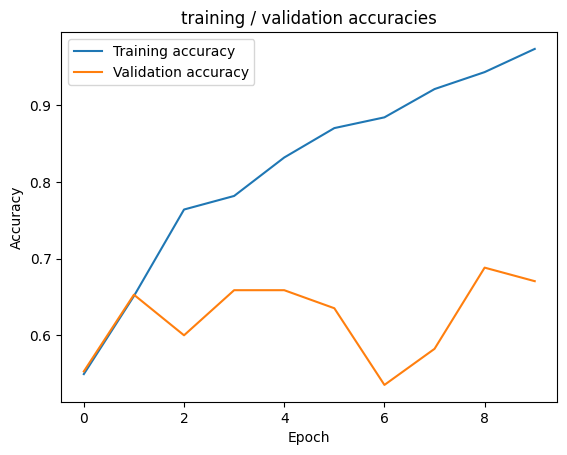

In [43]:
import matplotlib.pyplot as plt

# Visualize model history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

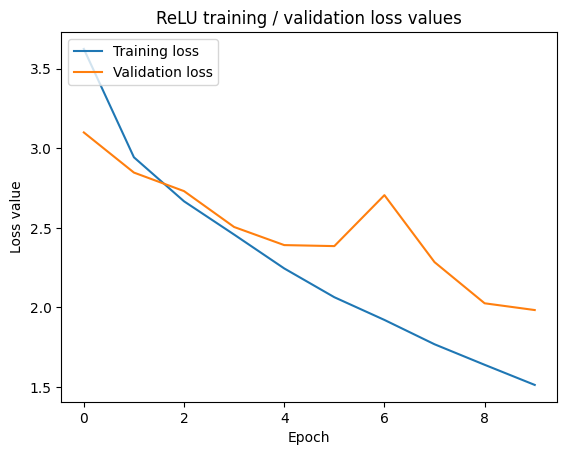

In [44]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()